# Fact-Checking Facebook Politics Pages
## Hyperpartisan Facebook pages and misleading information during the 2016 election

## Problem Defintion:
   ### <b>  During the 2016 US presidential election, the phrase “fake news” found its way to the forefront in news articles, tweets, and fiery online debates the world over after misleading and untrue stories proliferated rapidly. BuzzFeed News analyzed over 1,000 stories from hyperpartisan political Facebook pages selected from the right, left, and mainstream media to determine the nature and popularity of false or misleading information they shared.</b>
   ### This dataset supports the original story “Hyperpartisan Facebook Pages Are Publishing False And Misleading Information At An Alarming Rate” published October 20th, 2016. 
    

##### the link is: https://www.kaggle.com/mrisdal/fact-checking-facebook-politics-pages

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [71]:
df = pd.read_csv('/content/facebook-fact-check.csv')
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_id      2282 non-null   int64  
 1   post_id         2282 non-null   int64  
 2   Category        2282 non-null   object 
 3   Page            2282 non-null   object 
 4   Post URL        2282 non-null   object 
 5   Date Published  2282 non-null   object 
 6   Post Type       2282 non-null   object 
 7   Rating          2282 non-null   object 
 8   Debate          298 non-null    object 
 9   share_count     2212 non-null   float64
 10  reaction_count  2280 non-null   float64
 11  comment_count   2280 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 214.1+ KB


In [73]:
df['account_id'].unique()

array([184096565021911, 146422995398181, 219367258105115, 135665053303678,
       440106476051475, 346937065399354,     62317591679, 389658314427637,
       114517875225866])

In [74]:
df['Page'].value_counts()

Politico             536
CNN Politics         409
Eagle Rising         286
Right Wing News      268
Occupy Democrats     209
ABC News Politics    200
Addicting Info       140
The Other 98%        122
Freedom Daily        112
Name: Page, dtype: int64

In [75]:

(df['account_id'].astype(str)+df['Page']).unique()


array(['184096565021911ABC News Politics',
       '146422995398181Addicting Info', '219367258105115CNN Politics',
       '135665053303678Eagle Rising', '440106476051475Freedom Daily',
       '346937065399354Occupy Democrats', '62317591679Politico',
       '389658314427637Right Wing News', '114517875225866The Other 98%'],
      dtype=object)

#### we analysis data of 9 pages ,account_id is code of page and page is name of page
***

In [76]:
len(df['post_id'].unique())

2282

In [77]:
len(df['Post URL'].unique())

2282

#### post id is unique as Post URL .each post has unique id and url
***

In [78]:
df['Category'].value_counts()

mainstream    1145
right          666
left           471
Name: Category, dtype: int64

#### the Category is place of publication: mainstream ,right or left
***

In [79]:
df['Date Published'].unique()

array(['2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
       '2016-09-23', '2016-09-26', '2016-09-27'], dtype=object)

#### we have 7 dayes
***

In [80]:
df['Post Type'].unique()

array(['video', 'link', 'text', 'photo'], dtype=object)

In [81]:
df['Post Type'].value_counts()

link     1780
video     291
photo     207
text        4
Name: Post Type, dtype: int64

***

In [82]:
df['Rating'].unique()

array(['no factual content', 'mostly true', 'mixture of true and false',
       'mostly false'], dtype=object)

***

In [83]:

df['Debate'].unique()

array([nan, 'yes'], dtype=object)

In [84]:
df['Debate']= df['Debate'].replace(np.nan, 0)

In [85]:
df['Debate']= df['Debate'].replace('yes', 1)

In [86]:
df['Debate'].value_counts()

0    1984
1     298
Name: Debate, dtype: int64

***

In [87]:
df['share_count'].value_counts()

4.0        41
5.0        31
7.0        31
3.0        30
6.0        29
           ..
11931.0     1
1670.0      1
1086.0      1
537.0       1
40316.0     1
Name: share_count, Length: 950, dtype: int64

***

In [88]:
df['reaction_count'].value_counts()

31.0       10
62.0       10
47.0        9
19.0        9
50.0        9
           ..
2817.0      1
15494.0     1
8807.0      1
4284.0      1
20953.0     1
Name: reaction_count, Length: 1448, dtype: int64

***

In [89]:
df['comment_count'].value_counts()

18.0      28
16.0      25
6.0       23
5.0       23
17.0      21
          ..
661.0      1
819.0      1
1085.0     1
777.0      1
1524.0     1
Name: comment_count, Length: 813, dtype: int64

***

## Data Analayis :




    1-How do left, mainstream, and right categories of Facebook pages differ in the stories they share?
    (تاثير مكان النشر في التفاعل)

    2-Which types of stories receive the most engagement from their Facebook followers? Are videos or links more effective for engagement?
    (تاثير نوع البوست في التفاعل )

    3-Can you replicate BuzzFeed’s findings that “the least accurate pages generated some of the highest numbers of shares, reactions, and comments on Facebook”?

    4-the effect of the post type on the engagement with Rating
    ( تاثير نوع البوست في التفاعلمع المصدقية بمعني هل فديو ممكن يحصل علي تفاعل اكثرحتي لو الخبر غير صحيح)
    
    5-The effect of page on the engagement with Rating
    (هل صفحة نشر بتاثر في التفاعل)
    
    6-which page has the most 'Mostly True'  , 'No Factual Content' and 'Mostly False' rate
    (اي الصفحة بتنشر اخبار حقيقية و ايهم بينشر اخبار كاذبة)
    
    7-no. of posts through day 
    
    8-the effect of post type in debate
    
    9-How do left, mainstream, and right categories of Facebook pages differ in debate
    

In [90]:
df.groupby('Category')[['share_count','reaction_count','comment_count']].describe().transpose()


Category                      left    mainstream         right
share_count    count  4.410000e+02   1116.000000    655.000000
               mean   1.802528e+04    160.656810   1249.911450
               std    6.486066e+04    939.808276   3385.122061
               min    1.000000e+00      1.000000      2.000000
               25%    8.640000e+02     13.000000     44.500000
               50%    3.658000e+03     33.000000    209.000000
               75%    1.385000e+04    100.250000    973.500000
               max    1.088995e+06  22880.000000  40316.000000
reaction_count count  4.700000e+02   1145.000000    665.000000
               mean   2.174489e+04    694.371179   1827.690226
               std    3.756936e+04   1863.640252   3549.938221
               min    7.100000e+01      2.000000      2.000000
               25%    3.326750e+03     92.000000    142.000000
               50%    9.549000e+03    260.000000    531.000000
               75%    2.713625e+04    668.000000   1733.000000
               max    4.564580e+05  39730.000000  31112.000000
comment_count  count  4.700000e+02   1145.000000    665.000000
               mean   1.623264e+03    207.221834    265.428571
               std    7.710416e+03    346.028544    659.400272
               min    1.000000e+00      0.000000      0.000000
               25%    2.962500e+02     39.000000     16.000000
               50%    5.920000e+02    103.000000     51.000000
               75%    1.397500e+03    238.000000    210.000000
               max    1.590470e+05   5400.000000   6711.000000

In [91]:
df.groupby('Category')[['share_count','reaction_count','comment_count']].mean()

,share_count,reaction_count,comment_count
Category,,,
left,18025.276644,21744.893617,1623.263830
mainstream,160.656810,694.371179,207.221834
right,1249.911450,1827.690226,265.428571


In [92]:
df.groupby('Category')[['share_count','reaction_count','comment_count']].count()

,share_count,reaction_count,comment_count
Category,,,
left,441,470,470
mainstream,1116,1145,1145
right,655,665,665


علي الرغم ان البوستات في الوسط اكثر ثم ياليه اليمين ثم الشمال الا ان التفاعل مع الشمال اكثر ثم اليمين ثم الوسط 

In [93]:
df.groupby('Post Type')[['share_count','reaction_count','comment_count']].mean()

,share_count,reaction_count,comment_count
Post Type,,,
link,1222.195701,2403.888702,310.169196
photo,16038.428571,25102.425121,842.980676
text,2.750000,51.250000,34.500000
video,14929.290984,9509.117241,1552.713793


الصور هي الاكثر في التفعل وثم ياليها الفيديو ولكن الفيديو بكون الاكثر في تعليقات عن الصور ثم ياتي بعد ذلك اللينك ثم النصوص

In [94]:
df.groupby(['Post Type','Rating'])[['share_count','reaction_count','comment_count']].mean()

share_count  ...  comment_count
Post Type Rating                                   ...               
link      mixture of true and false   2351.127753  ...     551.235808
          mostly false                3135.425532  ...     491.063158
          mostly true                  771.482558  ...     259.888006
          no factual content          3814.732394  ...     270.732394
photo     mixture of true and false  14248.833333  ...     758.166667
          mostly false                8112.333333  ...     666.777778
          mostly true                13191.741379  ...     707.634921
          no factual content         18048.024390  ...     925.317829
text      mixture of true and false      3.000000  ...       7.000000
          mostly true                    2.666667  ...      43.666667
video     mixture of true and false  86574.000000  ...    5896.333333
          mostly true                 4643.561224  ...     681.668203
          no factual content         51868.073171  ...    3895.281250

[13 rows x 3 columns]

الفيديو ايضا يعتبراكثر تفعل في حالةالاخبار المغلوطة 

In [95]:
df.groupby(['Page'])[['share_count','reaction_count','comment_count']].mean()


,share_count,reaction_count,comment_count
Page,,,
ABC News Politics,44.477273,176.670000,71.435000
Addicting Info,1270.358209,3120.307143,392.264286
CNN Politics,183.374384,677.657702,322.097800
Eagle Rising,616.122744,519.989510,79.482517
Freedom Daily,2474.387387,3685.108108,516.225225
Occupy Democrats,29204.721393,34668.736842,2858.100478
Politico,181.676030,900.296642,170.231343
Right Wing News,1398.385768,2453.917910,359.988806
The Other 98%,18007.264151,20971.000000,914.661157


اكثر الصفحات تفاعل هي 
 Occupy Democrats
ثم ياليه 
The Other 98%	

In [96]:
df.groupby(['Page','Rating'])[['share_count','reaction_count','comment_count']].mean()

share_count  ...  comment_count
Page              Rating                                   ...               
ABC News Politics mixture of true and false     76.000000  ...      59.000000
                  mostly true                   42.377358  ...      66.813953
                  no factual content            62.533333  ...     102.961538
Addicting Info    mixture of true and false   1516.260870  ...     459.560000
                  mostly false                1891.285714  ...     704.125000
                  mostly true                 1004.872340  ...     367.697917
                  no factual content          2765.700000  ...     226.909091
CNN Politics      mixture of true and false    239.000000  ...     262.250000
                  mostly true                  181.133508  ...     321.462338
                  no factual content           215.050000  ...     346.300000
Eagle Rising      mixture of true and false   1182.169811  ...     148.740741
                  mostly false                1300.500000  ...      88.900000
                  mostly true                  262.891667  ...      66.925620
                  no factual content           506.067568  ...      48.580247
Freedom Daily     mixture of true and false   1377.423077  ...     553.384615
                  mostly false                3390.153846  ...     575.730769
                  mostly true                 2542.763636  ...     479.672727
                  no factual content          2712.000000  ...     390.500000
Occupy Democrats  mixture of true and false  26035.606061  ...    2924.060606
                  mostly false               10603.000000  ...    1425.555556
                  mostly true                16215.202020  ...    1624.441176
                  no factual content         55170.700000  ...    4958.861538
Politico          mixture of true and false   7325.000000  ...    1510.000000
                  mostly true                  155.640684  ...     166.477273
                  no factual content            83.000000  ...      54.000000
Right Wing News   mixture of true and false   1472.471910  ...     447.696629
                  mostly false                2431.807692  ...     434.461538
                  mostly true                  668.411348  ...     291.352113
                  no factual content          7713.272727  ...     360.363636
The Other 98%     mixture of true and false   9543.888889  ...     942.100000
                  mostly false               13737.800000  ...    1051.400000
                  mostly true                10765.280702  ...     792.727273
                  no factual content         32587.571429  ...    1091.900000

[33 rows x 3 columns]

لم يتاثر التفاعل بمدي مصداقية الخبر ولكن يعتمد التفاعل مع الصفحة

In [97]:
df[df['Rating']=='mostly true']['Page'].value_counts()


Politico             528
CNN Politics         385
ABC News Politics    172
Right Wing News      142
Eagle Rising         121
Occupy Democrats     102
Addicting Info        96
The Other 98%         67
Freedom Daily         56
Name: Page, dtype: int64

اكثرالصفحات التي تنشراخبار صحيحة هي
Politico 
اقل الصفحات التي تنشر اخبار صحيحة هي
Freedom Daily

In [98]:
df[(df['Rating']=='mostly false')|(df['Rating']=='no factual content')]['Page'].value_counts()

Eagle Rising         111
Occupy Democrats      74
The Other 98%         45
Right Wing News       37
Freedom Daily         30
ABC News Politics     26
CNN Politics          20
Addicting Info        19
Politico               6
Name: Page, dtype: int64

اكثر الصفحات التي تنشر اخبار هي
Eagle Rising
اقلهم هي 
Politico

In [99]:
df.groupby('Date Published')['account_id'].count()

Date Published
2016-09-19    306
2016-09-20    317
2016-09-21    306
2016-09-22    293
2016-09-23    294
2016-09-26    403
2016-09-27    363
Name: account_id, dtype: int64

In [100]:
df['account_id'].count()/len(df['Date Published'].unique())

326.0

متوسط عدد الاخبار في اليوم 326

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


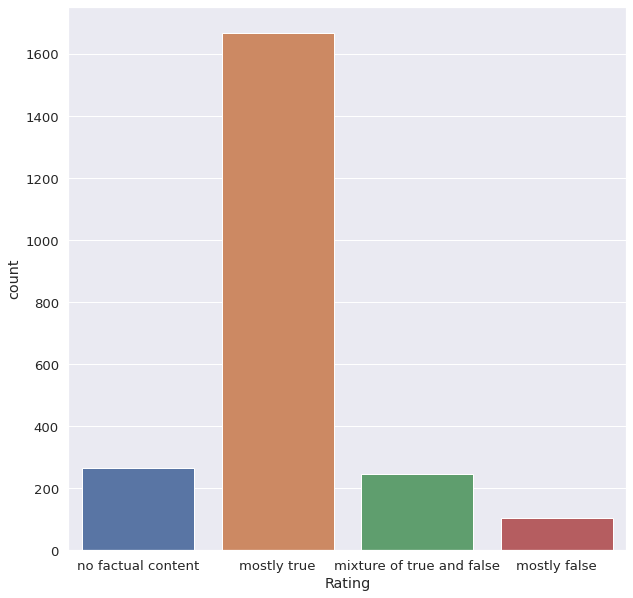

In [101]:
sns.countplot(df['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


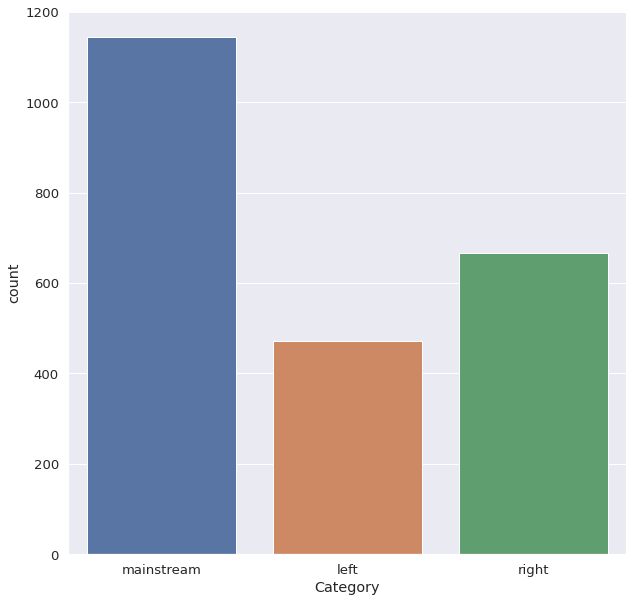

In [102]:
sns.countplot(df['Category'])

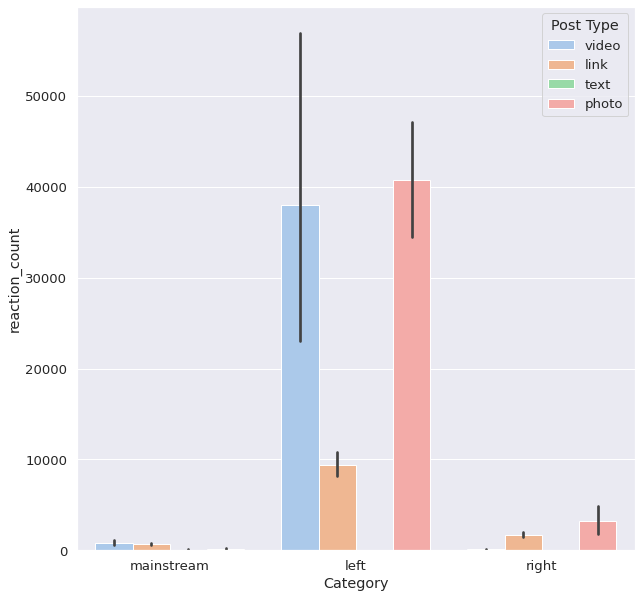

In [103]:
sns.barplot(x="Category", y="reaction_count",hue="Post Type", data=df, palette = 'pastel')

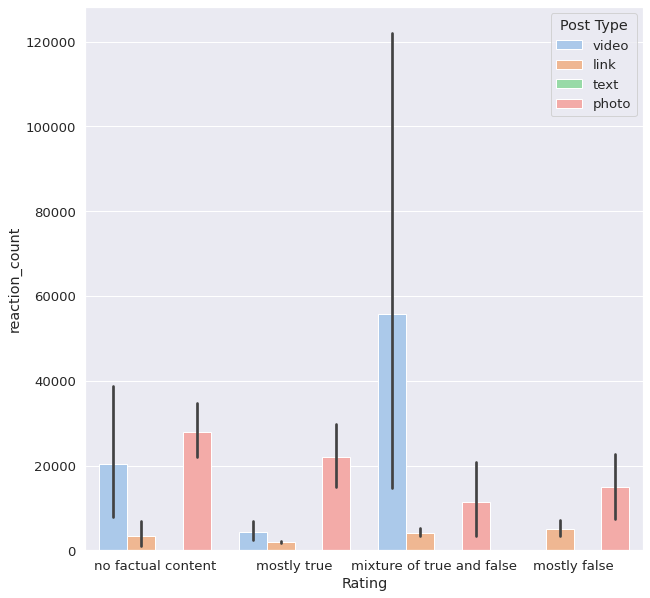

In [35]:
sns.barplot(x="Rating", y="reaction_count",hue="Post Type", data=df, palette = 'pastel')

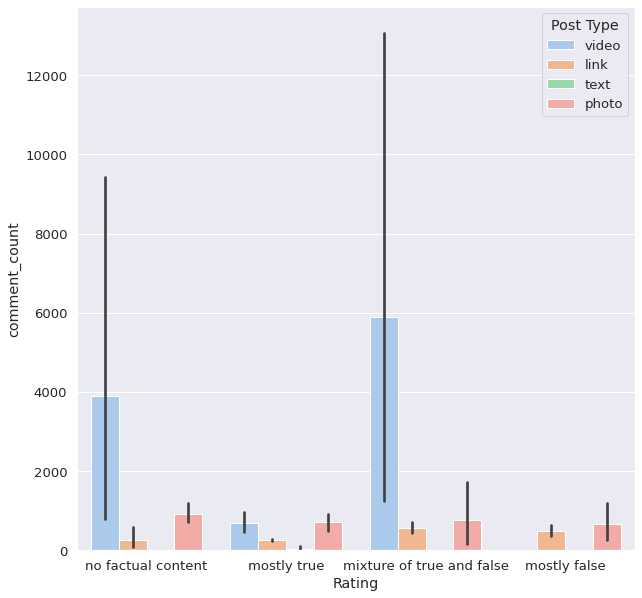

In [36]:
sns.barplot(x="Rating", y="comment_count",hue="Post Type", data=df, palette = 'pastel')

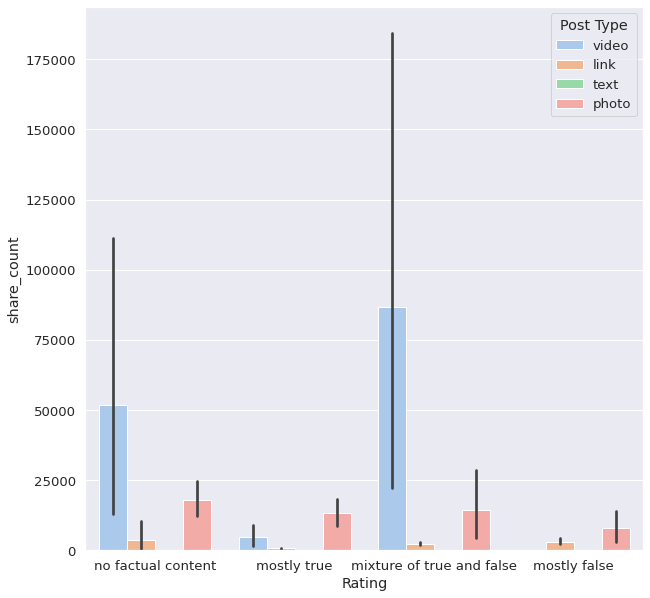

In [37]:
sns.barplot(x="Rating", y="share_count",hue="Post Type", data=df, palette = 'pastel')

In [38]:
df.drop(['post_id','Post URL'],axis=1,inplace=True)

In [39]:
df

,account_id,Category,Page,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,mainstream,ABC News Politics,2016-09-19,video,no factual content,0,NaN,146.0,15.0
1,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,1.0,33.0,34.0
2,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,34.0,63.0,27.0
3,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,35.0,170.0,86.0
4,184096565021911,mainstream,ABC News Politics,2016-09-19,video,mostly true,0,568.0,3188.0,2815.0
...,...,...,...,...,...,...,...,...,...,...
2277,114517875225866,left,The Other 98%,2016-09-27,photo,no factual content,0,21563.0,33388.0,391.0
2278,114517875225866,left,The Other 98%,2016-09-27,link,mostly true,0,1451.0,4828.0,342.0
2279,114517875225866,left,The Other 98%,2016-09-27,link,mixture of true and false,0,8236.0,12083.0,856.0
2280,114517875225866,left,The Other 98%,2016-09-27,link,mostly true,1,3985.0,12966.0,538.0


In [40]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['share_count'] = imputer.fit_transform(df[['share_count']])
df['share_count'].isnull().sum()

0

In [41]:
imputer1 = KNNImputer()
df['reaction_count'] = imputer1.fit_transform(df[['reaction_count']])
df['reaction_count'].isnull().sum()

0

In [42]:
imputer2= KNNImputer()
df['comment_count'] = imputer2.fit_transform(df[['comment_count']])
df['comment_count'].isnull().sum()

0

In [43]:
df['Date Published'] = pd.to_datetime(df['Date Published'], format='%Y-%m-%d', errors="coerce")

In [44]:
df['Day'] = df['Date Published'].dt.day


In [45]:
df

,account_id,Category,Page,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,Day
0,184096565021911,mainstream,ABC News Politics,2016-09-19,video,no factual content,0,4044.815552,146.0,15.0,19
1,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,1.000000,33.0,34.0,19
2,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,34.000000,63.0,27.0,19
3,184096565021911,mainstream,ABC News Politics,2016-09-19,link,mostly true,0,35.000000,170.0,86.0,19
4,184096565021911,mainstream,ABC News Politics,2016-09-19,video,mostly true,0,568.000000,3188.0,2815.0,19
...,...,...,...,...,...,...,...,...,...,...,...
2277,114517875225866,left,The Other 98%,2016-09-27,photo,no factual content,0,21563.000000,33388.0,391.0,27
2278,114517875225866,left,The Other 98%,2016-09-27,link,mostly true,0,1451.000000,4828.0,342.0,27
2279,114517875225866,left,The Other 98%,2016-09-27,link,mixture of true and false,0,8236.000000,12083.0,856.0,27
2280,114517875225866,left,The Other 98%,2016-09-27,link,mostly true,1,3985.000000,12966.0,538.0,27


In [46]:
df.drop(['Date Published'],axis=1,inplace=True)

In [47]:
df

,account_id,Category,Page,Post Type,Rating,Debate,share_count,reaction_count,comment_count,Day
0,184096565021911,mainstream,ABC News Politics,video,no factual content,0,4044.815552,146.0,15.0,19
1,184096565021911,mainstream,ABC News Politics,link,mostly true,0,1.000000,33.0,34.0,19
2,184096565021911,mainstream,ABC News Politics,link,mostly true,0,34.000000,63.0,27.0,19
3,184096565021911,mainstream,ABC News Politics,link,mostly true,0,35.000000,170.0,86.0,19
4,184096565021911,mainstream,ABC News Politics,video,mostly true,0,568.000000,3188.0,2815.0,19
...,...,...,...,...,...,...,...,...,...,...
2277,114517875225866,left,The Other 98%,photo,no factual content,0,21563.000000,33388.0,391.0,27
2278,114517875225866,left,The Other 98%,link,mostly true,0,1451.000000,4828.0,342.0,27
2279,114517875225866,left,The Other 98%,link,mixture of true and false,0,8236.000000,12083.0,856.0,27
2280,114517875225866,left,The Other 98%,link,mostly true,1,3985.000000,12966.0,538.0,27


In [48]:
df.drop(['account_id'],axis=1,inplace=True)

In [49]:
df

,Category,Page,Post Type,Rating,Debate,share_count,reaction_count,comment_count,Day
0,mainstream,ABC News Politics,video,no factual content,0,4044.815552,146.0,15.0,19
1,mainstream,ABC News Politics,link,mostly true,0,1.000000,33.0,34.0,19
2,mainstream,ABC News Politics,link,mostly true,0,34.000000,63.0,27.0,19
3,mainstream,ABC News Politics,link,mostly true,0,35.000000,170.0,86.0,19
4,mainstream,ABC News Politics,video,mostly true,0,568.000000,3188.0,2815.0,19
...,...,...,...,...,...,...,...,...,...
2277,left,The Other 98%,photo,no factual content,0,21563.000000,33388.0,391.0,27
2278,left,The Other 98%,link,mostly true,0,1451.000000,4828.0,342.0,27
2279,left,The Other 98%,link,mixture of true and false,0,8236.000000,12083.0,856.0,27
2280,left,The Other 98%,link,mostly true,1,3985.000000,12966.0,538.0,27


In [50]:
df = pd.get_dummies(df, columns=['Category', 'Page', 'Post Type', 'Rating'], drop_first=True)

In [51]:
df

,Debate,share_count,reaction_count,comment_count,Day,Category_mainstream,Category_right,Page_Addicting Info,Page_CNN Politics,Page_Eagle Rising,Page_Freedom Daily,Page_Occupy Democrats,Page_Politico,Page_Right Wing News,Page_The Other 98%,Post Type_photo,Post Type_text,Post Type_video,Rating_mostly false,Rating_mostly true,Rating_no factual content
0,0,4044.815552,146.0,15.0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1.000000,33.0,34.0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,34.000000,63.0,27.0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,35.000000,170.0,86.0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,568.000000,3188.0,2815.0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0,21563.000000,33388.0,391.0,27,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2278,0,1451.000000,4828.0,342.0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2279,0,8236.000000,12083.0,856.0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2280,1,3985.000000,12966.0,538.0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
y=df[['share_count','reaction_count','comment_count']]

In [53]:
y

,share_count,reaction_count,comment_count
0,4044.815552,146.0,15.0
1,1.000000,33.0,34.0
2,34.000000,63.0,27.0
3,35.000000,170.0,86.0
4,568.000000,3188.0,2815.0
...,...,...,...
2277,21563.000000,33388.0,391.0
2278,1451.000000,4828.0,342.0
2279,8236.000000,12083.0,856.0
2280,3985.000000,12966.0,538.0


In [54]:
X=df.drop(['share_count','reaction_count','comment_count'],axis=1)

In [55]:
X

,Debate,Day,Category_mainstream,Category_right,Page_Addicting Info,Page_CNN Politics,Page_Eagle Rising,Page_Freedom Daily,Page_Occupy Democrats,Page_Politico,Page_Right Wing News,Page_The Other 98%,Post Type_photo,Post Type_text,Post Type_video,Rating_mostly false,Rating_mostly true,Rating_no factual content
0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0,27,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2278,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2279,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2280,1,27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Debate                     2282 non-null   int64  
 1   share_count                2282 non-null   float64
 2   reaction_count             2282 non-null   float64
 3   comment_count              2282 non-null   float64
 4   Day                        2282 non-null   int64  
 5   Category_mainstream        2282 non-null   uint8  
 6   Category_right             2282 non-null   uint8  
 7   Page_Addicting Info        2282 non-null   uint8  
 8   Page_CNN Politics          2282 non-null   uint8  
 9   Page_Eagle Rising          2282 non-null   uint8  
 10  Page_Freedom Daily         2282 non-null   uint8  
 11  Page_Occupy Democrats      2282 non-null   uint8  
 12  Page_Politico              2282 non-null   uint8  
 13  Page_Right Wing News       2282 non-null   uint8

In [57]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [60]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
}

In [61]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.16303444350859234
Test Score: 0.23095769301762642
RMSE: 9390.383894636008
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.36918348432498205
Test Score: 0.10439116237253929
RMSE: 10133.685376044028
-----------------------------------------------------------
Using model: DT
Training Score: 0.578611034019536
Test Score: -1.0086342588460606
RMSE: 15176.047042036063
-----------------------------------------------------------
Using model: RF


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

Training Score: 0.5424056016436747
Test Score: -0.22842661878555778
RMSE: 11868.144914162458
-----------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [62]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# fit the model on the whole dataset
wrapper.fit(x_train, y_train)
print(f'Training Score: {wrapper.score(x_train, y_train)}')
print(f'Test Score: {wrapper.score(x_test, y_test)}')


Training Score: -0.02092983532533828
Test Score: -0.03377485730437143


In [63]:
model = SVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# fit the model on the whole dataset
wrapper.fit(x_train, y_train)
print(f'Training Score: {wrapper.score(x_train, y_train)}')
print(f'Test Score: {wrapper.score(x_test, y_test)}')

Training Score: -0.029409084936728558
Test Score: -0.0822926245309253


In [64]:
model = XGBRegressor()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# fit the model on the whole dataset
wrapper.fit(x_train, y_train)
print(f'Training Score: {wrapper.score(x_train, y_train)}')
print(f'Test Score: {wrapper.score(x_test, y_test)}')

[11:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.38904419789676287
Test Score: -0.751498446793604


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from numpy import mean
from numpy import std
from numpy import absolute
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y,  cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: 0.047 (0.020)


In [66]:
model = XGBRegressor()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 3318.323 (820.630)
